In [1]:
# importar librerias
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# lectura del archivo a analizar
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


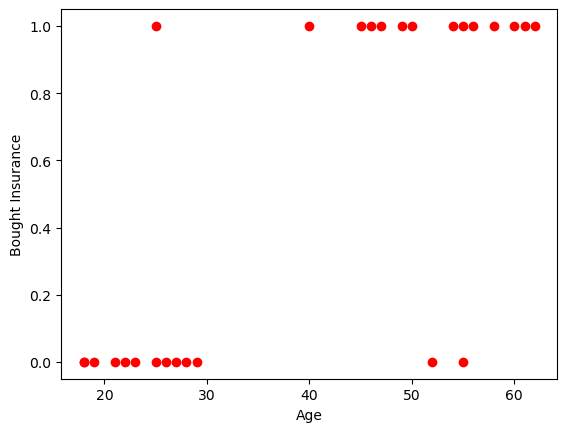

In [3]:
# grafico de dispersion
plt.scatter(df['age'], df['bought_insurance'], color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()

In [4]:
# Reshape de los datos para que tengan la forma correcta
x = df["age"].values.reshape((-1,1))
y = df["bought_insurance"].values.reshape((-1,1))

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [7]:
# Crear el modelo de regresión logistica
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

LogisticRegression()

In [8]:
# Puntos para la regresión
x_vals = np.linspace(x_test.min(), x_test.max(), 100)
y_vals = model.predict_proba(x_vals.reshape(-1, 1))[:, 1]

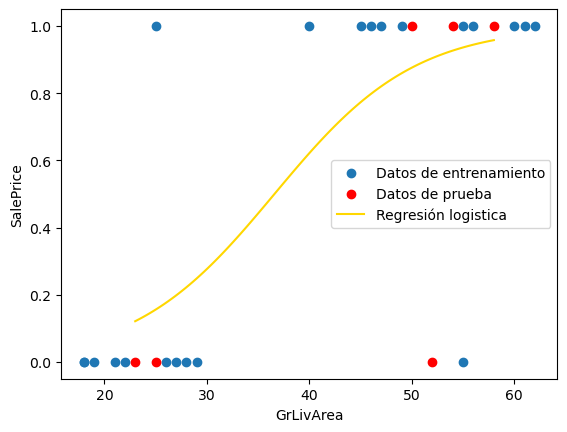

In [16]:
# Visualización de los resultados
plt.scatter(x_train, y_train, label='Datos de entrenamiento')
plt.scatter(x_test, y_test, color='red', label='Datos de prueba')
plt.plot(x_vals, y_vals, color='gold', label='Regresión logistica')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [17]:
# porcentaje de predicción
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# calculo de la pendiente m
m = model.coef_[0]

# calculo de la intercepcion con el eje Y
b = model.intercept_

print(f'Slope (m): {m[0]:.2f}')
print(f'Intercept (b): {b[0]:.2f}')

Accuracy: 0.83
Slope (m): 0.15
Intercept (b): -5.33


In [18]:
# funcion sigmoid
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
# funcion para predecir la edad
def prediction_function(age):
    z = m * age + b
    y = sigmoid(z)
    return y

In [38]:
age = 37
prediction_function(age)

0.5147454359294219